In [1]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
from numpy.linalg import inv
from numpy import dot,power
from utils import *

## Declare Variables 

In [2]:
nb_var_in = 4 #Dimension of input vector
nb_var_out = 1 #Dimension of output vector
nb_data = 40  #Number of datapoints

## Generate Data 

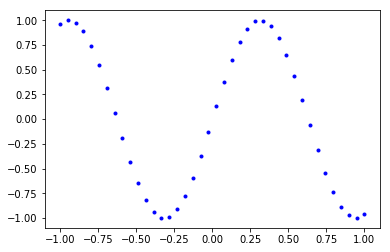

In [79]:
x = np.linspace(-1,1,nb_data)
#Y = dot(X,A0) + np.random.normal(size=(nb_data, nb_var_out))*2e-2
Y = np.sin(5*x)[:,None] #adding [:,None] is numpy trick to add one more dimension to the array, from (nb_data) to (nb_data,1)

plt.plot(x,Y, '.b')

## Solve the Regression Problem

### Project x to higher dimensions by polynomial expansion with degree d $\rightarrow$ X = $[x^0, x^1, ..., x^d]$

In [93]:
degree_pol = 5
X = power(x,0)
for i in range(1,degree_pol+1):
    X = np.vstack([X, power(x,i)])
X = X.T

#alternative: use sklearn library
#from sklearn.preprocessing import PolynomialFeatures
#poly_func = PolynomialFeatures(degree=degree_pol)
#X = poly_func.fit_transform(x[:,None]) 

### Solve the regression problem XA = Y 

#### 1. Standard LS 

In [94]:
A = dot(inv(dot(X.T,X)),dot(X.T, Y)) 
e = np.linalg.norm(dot(X,A)-Y)
plot_title = 'Least squares - Polynomial fit of degree ' + str(nb_var_in) + ' (e={0:0.2f})'.format(e)
print e

0.48914281464977194


#### 2. Ridge Regression 

In [95]:
#Naive computation of ridge regression
lamda = 1e-01
Gamma = np.eye(nb_var_in)*lamda
A = dot(inv(dot(X.T,X) + dot(Gamma.T,Gamma)),dot(X.T, Y)) 
e = np.linalg.norm(dot(X,A)-Y)
plot_title = 'Ridge Regression: Least squares - Polynomial fit of degree ' + str(nb_var_in) + ' (e={0:0.2f})'.format(e)
print e

ValueError: operands could not be broadcast together with shapes (6,6) (4,4) 

In [91]:
#Ridge regression computed with augmented matrices
lamda = 1e-01
Gamma = np.eye(nb_var_in)*lamda
Xa = np.vstack([X, Gamma])
Ya = np.vstack([Y, np.zeros((nb_var_in, nb_var_out))])
A = dot(inv(dot(Xa.T,Xa)),dot(Xa.T, Ya)) 
e = np.linalg.norm(dot(X,A)-Y)
plot_title = 'Ridge Regression: Least squares - Polynomial fit of degree ' + str(nb_var_in) + ' (e={0:0.2f})'.format(e)
print e

ValueError: all the input array dimensions except for the concatenation axis must match exactly

In [86]:
#Ridge regression computed with SVD
lamda = 1e-2
U,S,V = np.linalg.svd(X)

#Ridge regression computed with SVD
for i in range(len(S)):
    S[i] = S[i]/(S[i]**2 + lamda**2)
S_mat = np.vstack([np.diag(S), np.zeros((36,4))])
A = dot(V, dot(S_mat.T, dot(U.T, Y)))
e = np.linalg.norm(dot(X,A)-Y)
plot_title = 'Ridge Regression: Least squares - Polynomial fit of degree ' + str(nb_var_in) + ' (e={0:0.2f})'.format(e)
print e

2.4309071576222667


### Plot the predictive data (as line) and the true data (as points)

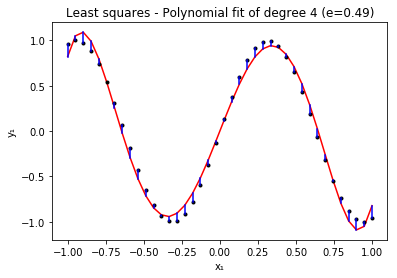

In [92]:
Y_pred = np.dot(X,A)
plot_data_2D(x,Y,Y_pred, title=plot_title)

## Regression with Nullspace 

#### Generate Data 

In [21]:
nb_var_in = 9 #Dimension of input vector
nb_var_out = 1 #Dimension of output vector
nb_data = 5  #Number of datapoints

#A0 = np.array([-.2, -.2, .2, .3, 1])[:,None]
A0 = np.random.rand(nb_var_in,1)
x = np.linspace(-1,1,nb_data)
degree_pol = 8
X = power(x,0)
for i in range(1,degree_pol+1):
    X = np.vstack([X, power(x,i)])

X = X.T
Y = dot(X,A0) + np.random.normal(size=(nb_data, nb_var_out))*2e-2

#### Calculate the Nullspace 

In [22]:
X_inv =  dot(X.T, inv(dot(X,X.T)))
N = np.eye(nb_var_in) - dot(X_inv,X)

#### Calculate the prediction

In [23]:
x_pred = np.linspace(-1,1,200)
X_pred = power(x_pred,0)
for i in range(1,degree_pol+1):
    X_pred = np.vstack([X_pred, power(x_pred,i)])
    
X_pred = X_pred.T

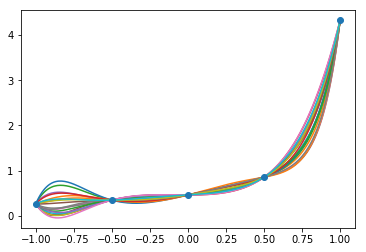

In [32]:
As = []
Y_preds = []
for n in range(20):
    v = 5*np.random.rand(nb_var_in)[:,None]
    A_cur = dot(X_inv,Y) + dot(N,v)
    Y_pred = dot(X_pred,A_cur)
    plt.plot(x_pred,Y_pred)
plt.plot(x,Y,'o')

## Weighted Least Square

#### Generate Data 

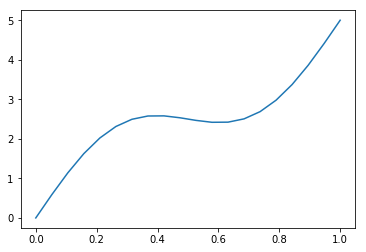

In [33]:
%matplotlib inline
nb_var_in = 1 #Dimension of input vector
nb_var_out = 1 #Dimension of output vector
nb_data = 20  #Number of datapoints

#A0 = np.array([-.2, -.2, .2, .3, 1])[:,None]
A0 = np.random.rand(nb_var_in,1)
X = np.linspace(0,1,nb_data)[:,None]
Y = np.sin(X*np.pi*2) + X*5 + np.random.normal(size=(nb_data,1), scale = 1e-10)
plt.plot(X,Y)

#### Calculate LS and Weighted LS 

In [34]:
#Calculate LS
A = dot(inv(dot(X.T,X)),dot(X.T, Y)) 

#Calculate Weighted LS
W = np.diag(np.cos(np.linspace(0,np.pi/2,nb_data))**6)
Aw = dot(inv(dot(X.T,dot(W,X))),dot(X.T, dot(W,Y)))

#### Plot prediction

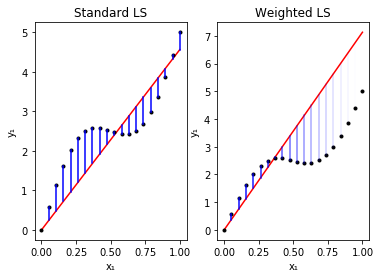

In [35]:
#plot standard LS
Y_pred = np.dot(X,A)
plot_title = 'Standard LS'
plt.subplot(1,2,1)
plot_data_2D(X,Y,Y_pred, title = plot_title)


#plot weighted LS
Y_pred = np.dot(X,Aw)
alphas = np.power(np.diagonal(W),0.3)
plot_title = 'Weighted LS'
plt.subplot(1,2,2)
plot_data_2D(X,Y,Y_pred, alphas = alphas, title = plot_title)

## Iterative Re-weighted Least Square

#### Generate Data 

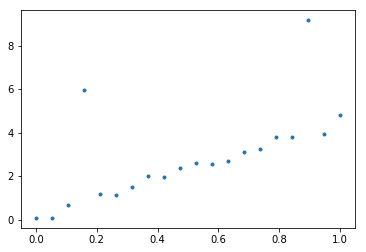

In [36]:
%matplotlib inline
nb_var_in = 1 #Dimension of input vector
nb_var_out = 1 #Dimension of output vector
nb_data = 20  #Number of datapoints
nb_iter = 10 #number of re-weighting iterations
p = 1 #L1 norm

A0 = np.random.rand(nb_var_in,nb_var_out)
X = np.linspace(0,1,nb_data)[:,None]
Y = dot(X,A) + np.random.normal(size=(nb_data,nb_var_out), scale = 0.2)
Y[3] += 5
Y[17] += 5
plt.plot(X,Y, '.')

#### Calculate LS and Iterative Re-weighted LS 

In [37]:
#Calculate LS
A = dot(inv(dot(X.T,X)),dot(X.T, Y))
Y_pred_ls = dot(X,A)
e_ls = np.linalg.norm(Y-Y_pred_ls,ord = 1)
plot_title_ls = 'LS (e={0:0.2f})'.format(e_ls)

In [38]:
#Calculate IRLS
W = np.eye(nb_data)
res_set = []
for i in range(nb_iter):
    Aw = dot(inv(dot(X.T,dot(W,X))),dot(X.T, dot(W,Y)))
    diff = np.abs(Y-dot(X,Aw)).flatten()
    res_set.append(np.sum(diff))
    W = np.diag(diff**(p-2))

In [39]:
Y_pred_irls = dot(X,Aw)
e_irls = np.linalg.norm(Y-Y_pred_irls,ord = 1)
print e_irls
plot_title_irls = 'IRLS (e={0:0.2f})'.format(e_irls)

13.10390857692191


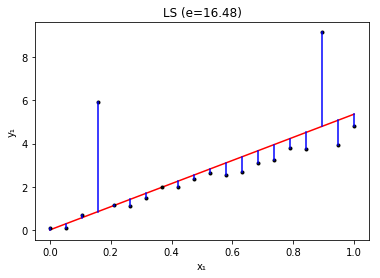

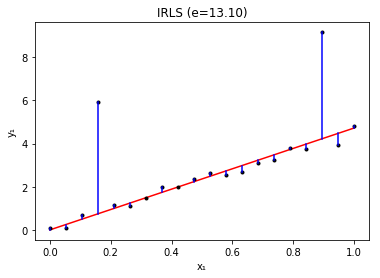

In [40]:
plt.figure()
plot_data_2D(X,Y,Y_pred_ls, title = plot_title_ls)
plt.figure()
plot_data_2D(X,Y,Y_pred_irls, title = plot_title_irls)


## Recursive Least Square 

#### Generate Data 

In [41]:
def func(X):
    return np.sin(X*np.pi*1.3) + X*5 + np.random.normal(size=(nb_data,1), scale = 1e-1)

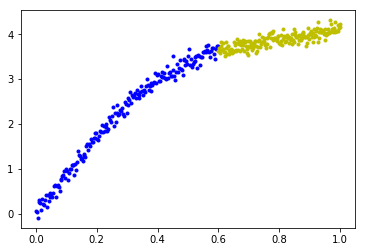

In [42]:
%matplotlib inline
nb_var_in = 1 #Dimension of input vector
nb_var_out = 1 #Dimension of output vector
nb_data = 200  #Number of datapoints

X = np.linspace(0,0.6,nb_data)[:,None]
Y = func(X)

#additional data
V = np.linspace(0.6,1.,nb_data)[:,None]
C = func(V)
plt.plot(X,Y,'.b')
plt.plot(V,C,'.y')

#### Calculate LS with the initial data 

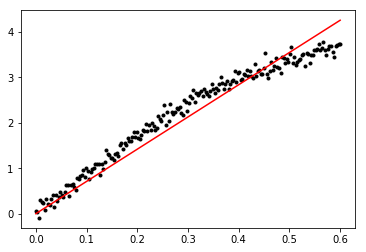

In [43]:
B_inv = inv(dot(X.T,X))
A = dot(B_inv,dot(X.T, Y)) 
Y_pred = dot(X,A)
plt.plot(X,Y,'.k')
plt.plot(X,Y_pred,'-r')

#### Update LS with the new data 

In [44]:
K = dot(B_inv, dot(V.T, inv(np.eye(nb_data) + dot(V,dot(B_inv, V.T)))))
A_new = A + dot(K,C-dot(V,A))

#### Compare standard LS and RLS 

In [45]:
X_new = np.vstack([X,V])
Y_new = np.vstack([Y,C])

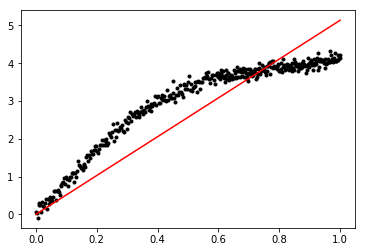

In [46]:
#Standard LS
A_LS = dot(inv(dot(X_new.T,X_new)),dot(X_new.T, Y_new)) 
Y_LS = dot(X_new, A_LS)
plt.plot(X_new, Y_new, '.k')
plt.plot(X_new, Y_LS,'-r')

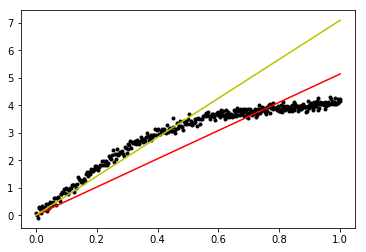

In [47]:
#Reweighted LS
Y_init = dot(X_new, A)
Y_RLS = dot(X_new, A_new)
plt.plot(X_new, Y_new, '.k')
plt.plot(X_new, Y_RLS, '-r')
plt.plot(X_new, Y_init, '-y')

#### Logistic Regression 